In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
import s1 

In [4]:
map_synch = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_Synchrotron-commander_0256_R2.00.fits")

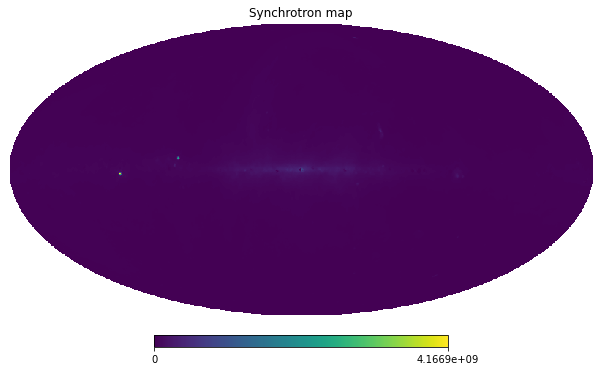

In [5]:

hp.mollview(map_synch  ,title="Synchrotron map")


In [6]:
nside = hp.pixelfunc.get_nside(map_synch)
print (nside)

256


In [8]:
res_synch = hp.nside2resol (nside, arcmin= False )
res_synch_arcmin = hp.nside2resol(nside , arcmin= True)

In [9]:
cl_synch = hp.anafast(map_synch)

In [11]:
lmax=np.shape(cl_synch)[0]
ell=np.arange(0,lmax)
norm = ell * (ell+1) / (2*np.pi)
dl_synch = cl_synch * norm

<ipython-input-12-b57bff1753d5>:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 360*60/ell
<ipython-input-12-b57bff1753d5>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc,np.log(dl_synch))


Text(0, 0.5, '$log(D_l)$')

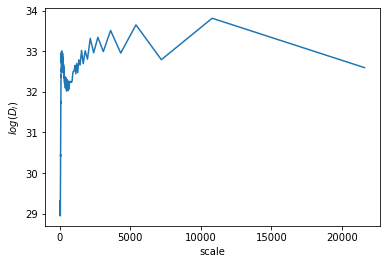

In [12]:
ellsc = 360*60/ell
plt.plot(ellsc,np.log(dl_synch))
plt.xlabel("scale")
plt.ylabel("$log(D_l)$")

In [13]:
alm_synch = hp.map2alm (map_synch)

In [14]:
resol = hp.nside2resol(nside, arcmin=False )
resol_arcmin = hp.nside2resol(nside, arcmin=True )
print (resol)

0.003997369952915971


In [15]:
jmax = 10
theta_bin = 10000

In [16]:
mor_l = s1.morlet_arr (resol, jmax , lmax, theta_bin)
gaus_l = s1.gaus_arr (resol, jmax, lmax, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [17]:
s1_synch , i1_synch = s1.compS1 (map_synch , mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'log(S1)')

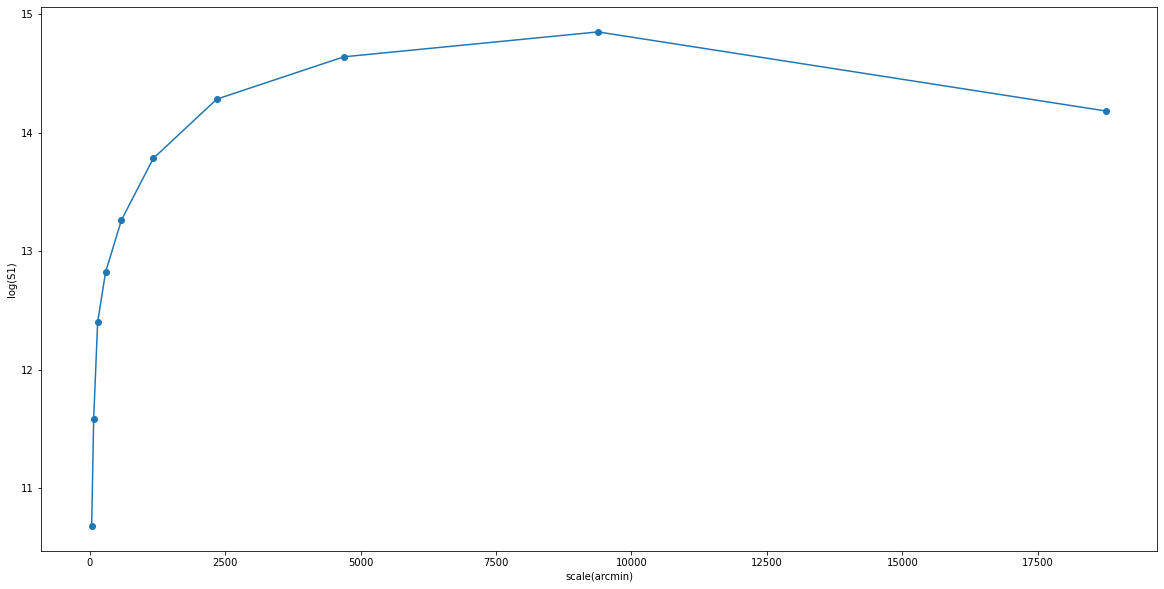

In [18]:
Jf=np.arange(jmax)
res256_arcmin = hp.nside2resol(256, arcmin=True)
scale=2**Jf*((2*res256_arcmin)/0.75)
plt.figure(figsize=(20,10))
plt.plot (scale,np.log(s1_synch),'o-')
plt.xlabel("scale(arcmin)")
plt.ylabel("log(S1)") 

In [19]:
s2_synch  = s1.compS2 (map_synch , i1_synch, mor_l, gaus_l, resol, jmax , lmax , nside)

0
1
2
3
4
5
6
7
8
9


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


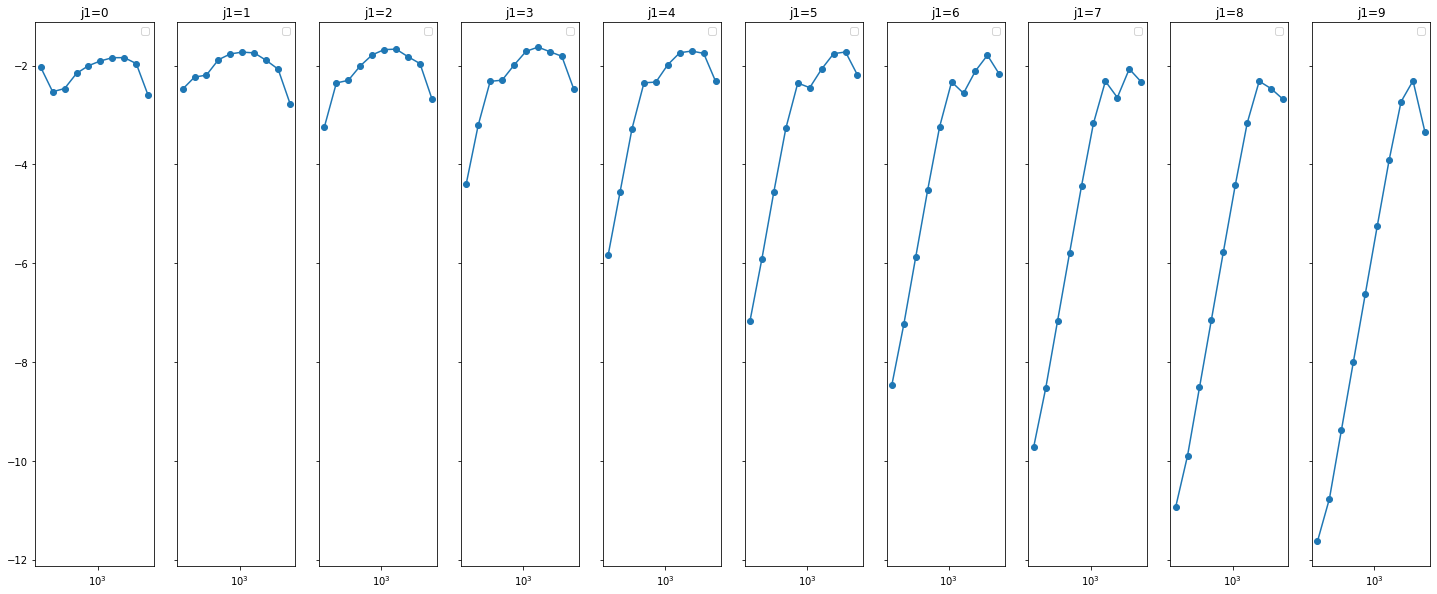

In [20]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (jmax):
    ax[j].plot (scale,np.log(s2_synch[j,:]/s1_synch[j]),'o-')
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()